In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
from utils.paths import *

import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
def get_scores_dataframe(dataset, dims, prefix=""):
    df = None

    for prueba in pruebas:
        path = os.path.join(scores_path, dataset, prueba, "%s%d.csv" % (prefix, dims))
        
        if os.path.exists(path):
            #print path
            if df is None:
                df = pd.read_csv(path, sep=',', header=0)
            else:
                new_df = pd.read_csv(path, sep=',', header=0)
                df = df.append(new_df, ignore_index=True)
    
    if df is None:
        return pd.DataFrame(columns=dataframe_columns)
                
    #se dejan disponibles solamente la tarea, el tipo de adaptacion y el error
    df_a = df[['Adaptacion', 'Tarea', 'Transfer loss']]
    
    # se manipula el dataframe para dejar la adaptacion como columna 
    df_a = df_a.groupby(['Tarea', 'Adaptacion'], as_index=True ).max()
    df_a = df_a.unstack(level=1)
    df_a.columns = df_a.columns.levels[1]
    
    return df_a

In [4]:
def get_comparison_dataframe(dataset, dims, method):
    df = None

    for prefix in ["me1_", "me2_"]:
        path = os.path.join(scores_path, dataset, method, "%s%d.csv" % (prefix, dims))
        
        if os.path.exists(path):
            if df is None:
                df = pd.read_csv(path, sep=',', header=0)
                
                if prefix == "me1_":
                    df['Adaptacion'] = df['Adaptacion'] + " (ME1)"
                elif prefix is "me2_":
                    df['Adaptacion'] = df['Adaptacion'] + " (ME2)"
                
            else:
                new_df = pd.read_csv(path, sep=',', header=0)
                
                
                if prefix == "me1_":
                    new_df['Adaptacion'] = new_df['Adaptacion'] + " (ME1)"
                elif prefix is "me2_":
                    new_df['Adaptacion'] = new_df['Adaptacion'] + " (ME2)"
                
                df = df.append(new_df, ignore_index=True)
           
    if df is None:
        return pd.DataFrame(columns=dataframe_columns)
                
    #se dejan disponibles solamente la tarea, el tipo de adaptacion y el error
    df_a = df[['Adaptacion', 'Tarea', 'Transfer loss']]
    
    # se manipula el dataframe para dejar la adaptacion como columna 
    df_a = df_a.groupby(['Tarea', 'Adaptacion'], as_index=True ).max()
    df_a = df_a.unstack(level=1)
    df_a.columns = df_a.columns.levels[1]
    
    return df_a

# Dataset Amazon

### El dataset Amazon posee las siguientes características:

| Dominio     | Entrenamiento | Prueba |  % Positivos  | No Etiquetados |
|-------------|---------------|--------|---------------|----------------|
| books       |     1600      | 400    |      50%      |      4465      |
| dvd         |     1600      | 400    |      50%      |      5945      |
| electronics |     1600      | 400    |      50%      |      5681      |
| kitchen     |     1600      | 400    |      50%      |      3586      |


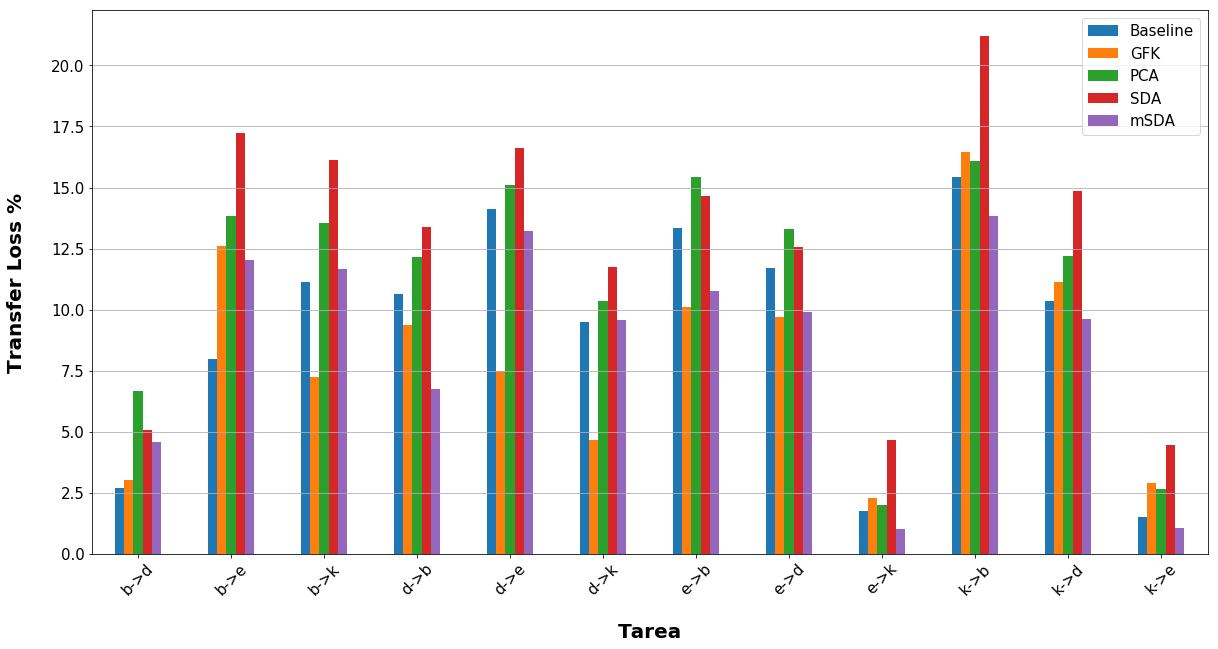

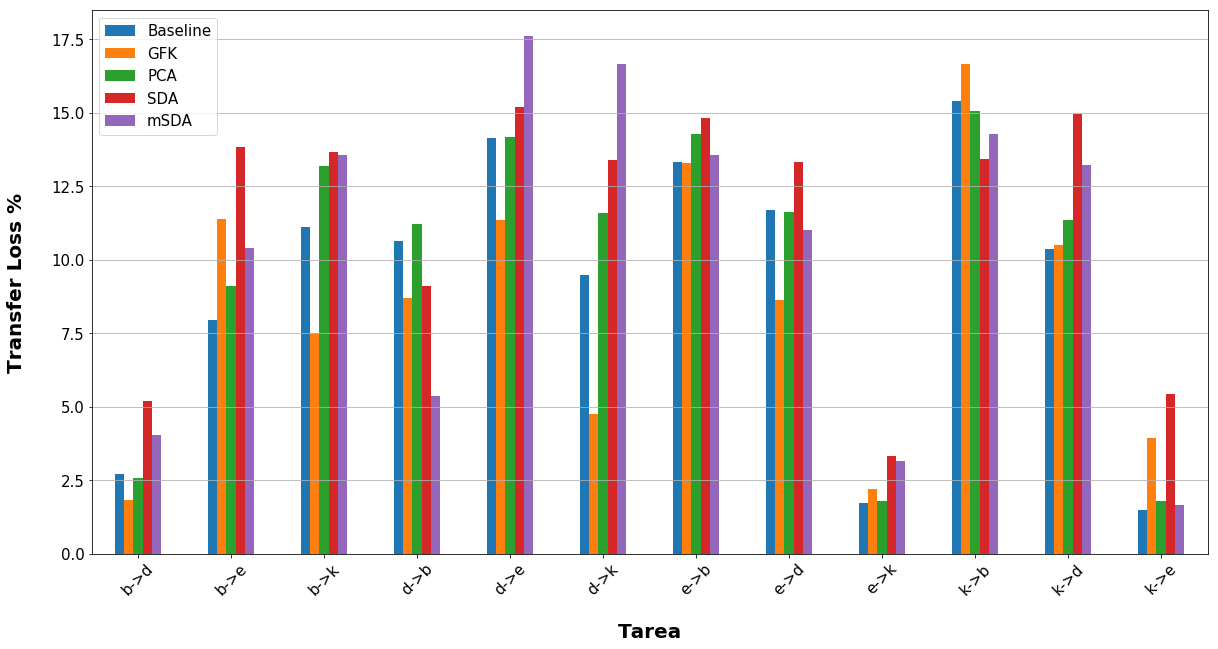

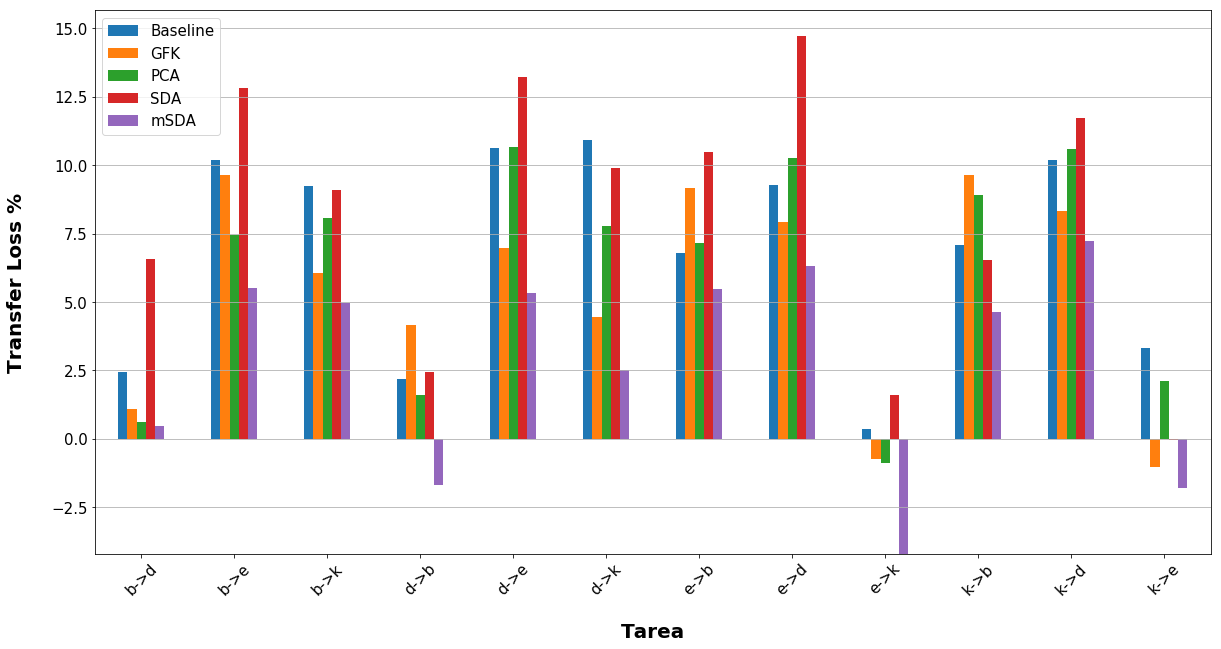

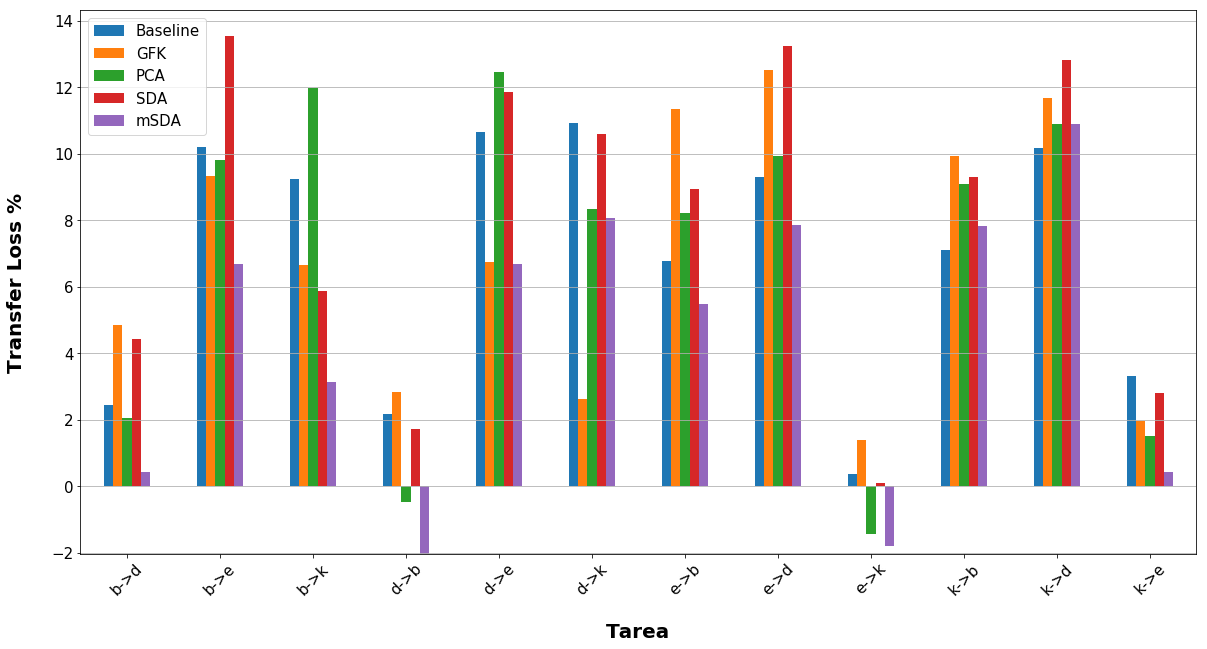

In [5]:
dimensions = [3000, 1000]
prefixes = ["me1_", "me2_"]
dataset_name = datasets[0]

pairs = [(x, y) for x in dimensions for y in prefixes]

for dim, prefix in pairs:
    df_amazon = get_scores_dataframe(dataset_name, dim, prefix)
    
    amazon_plot = df_amazon.plot(kind='bar', figsize=(20,10), rot=45, fontsize=15, legend=False)
    patches, labels = amazon_plot.get_legend_handles_labels()

    amazon_plot.legend(patches, labels, loc='best', fontsize=15)
    amazon_plot.yaxis.grid(which='major')

    amazon_plot.set_ylabel("Transfer Loss %", labelpad=25,fontsize=20, weight='bold')
    amazon_plot.set_xlabel("Tarea", labelpad=25,fontsize=20, weight='bold')

    figure_path = os.path.join(graficos_path, dataset_name, "%stloss_%d.eps" % (prefix, dim))
    plt.savefig(figure_path, bbox_inches='tight')


# Dataset Twitter


### El dataset Twitter posee las siguientes características:

| Dominio  | Entrenamiento | Prueba |  Total  |
|----------|---------------|--------|---------|
| thevoice |      518      |   130  |   648   |
| rio2016  |      380      |   96   |   476   |


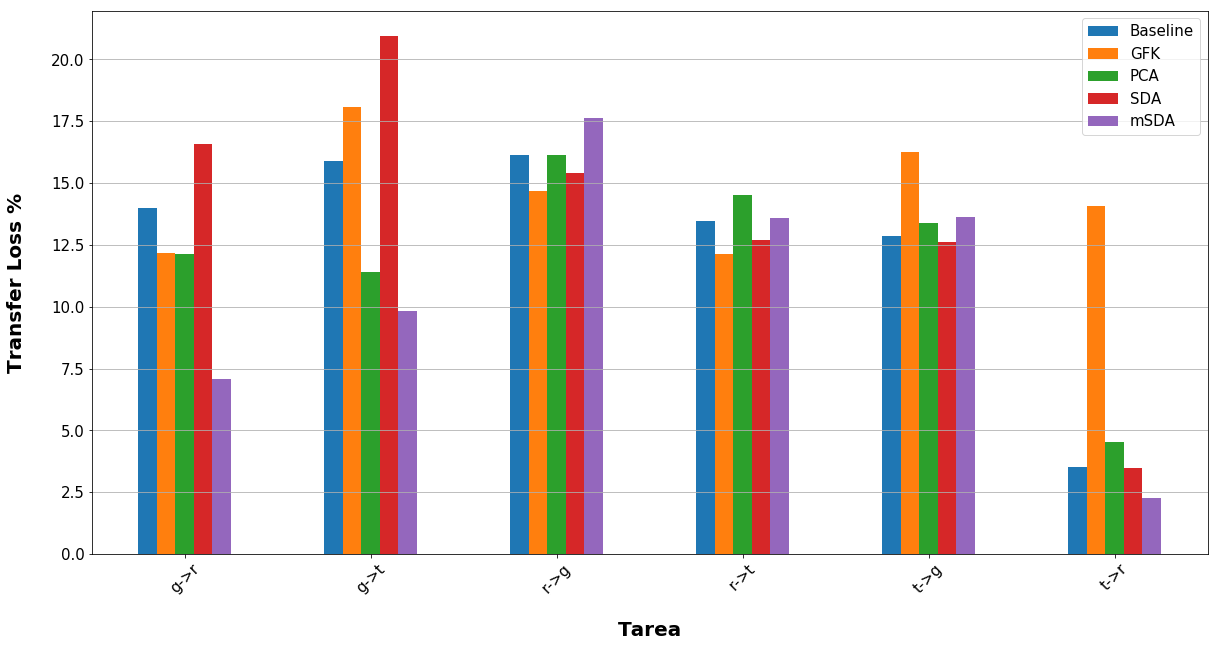

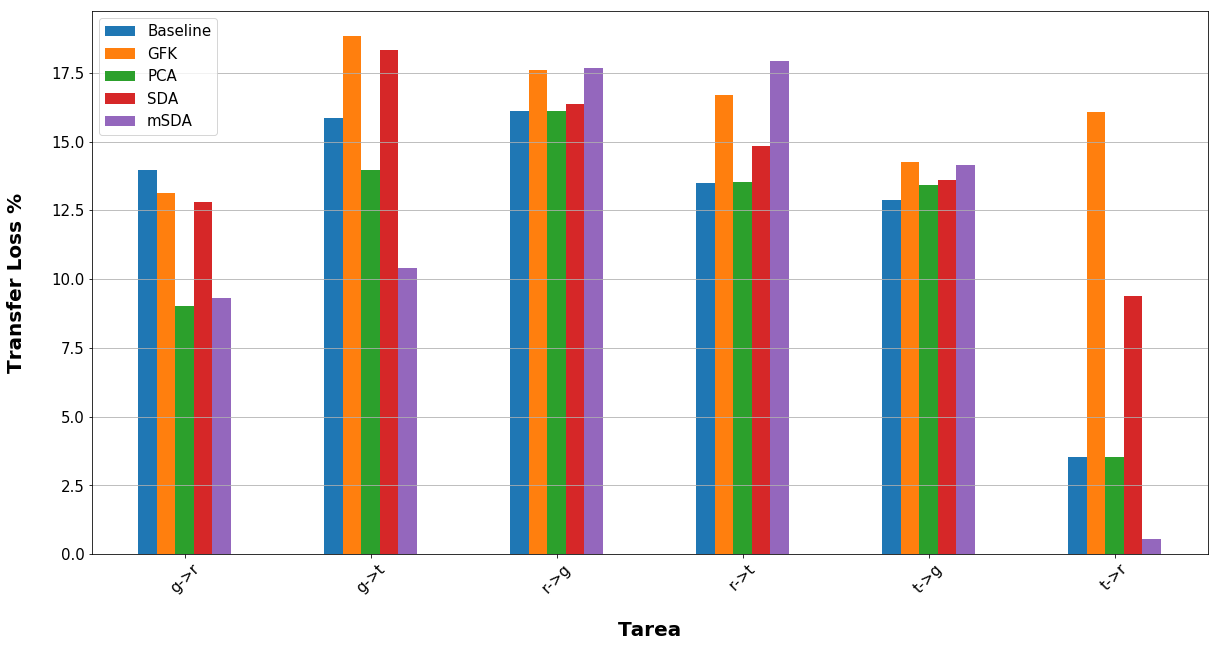

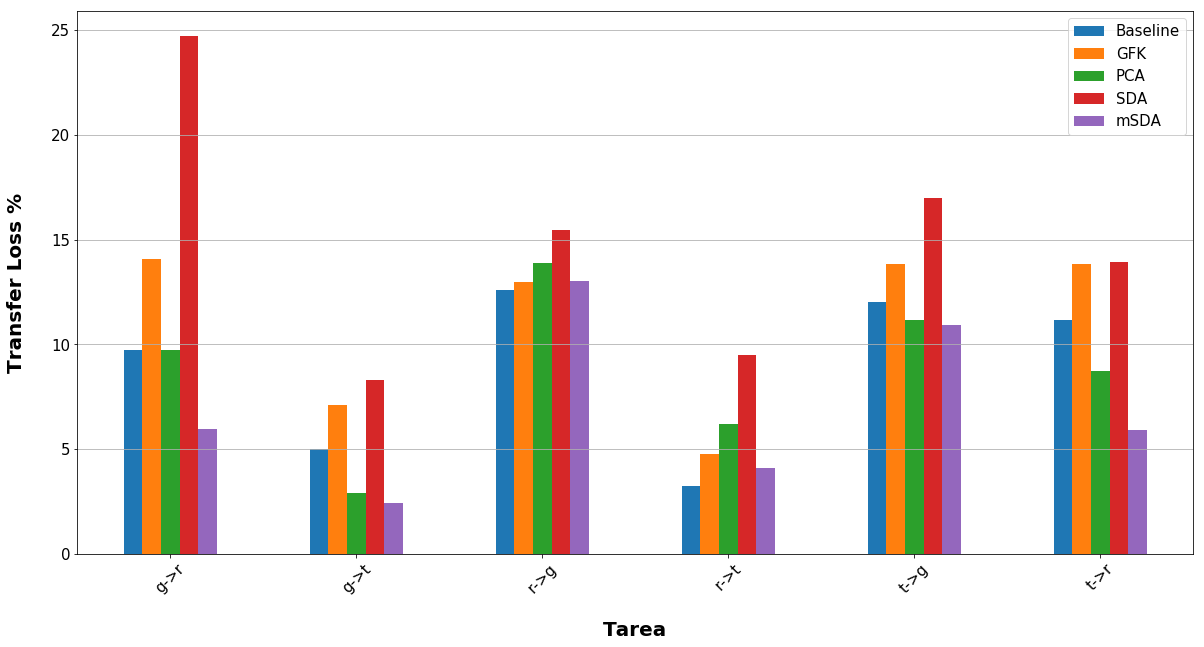

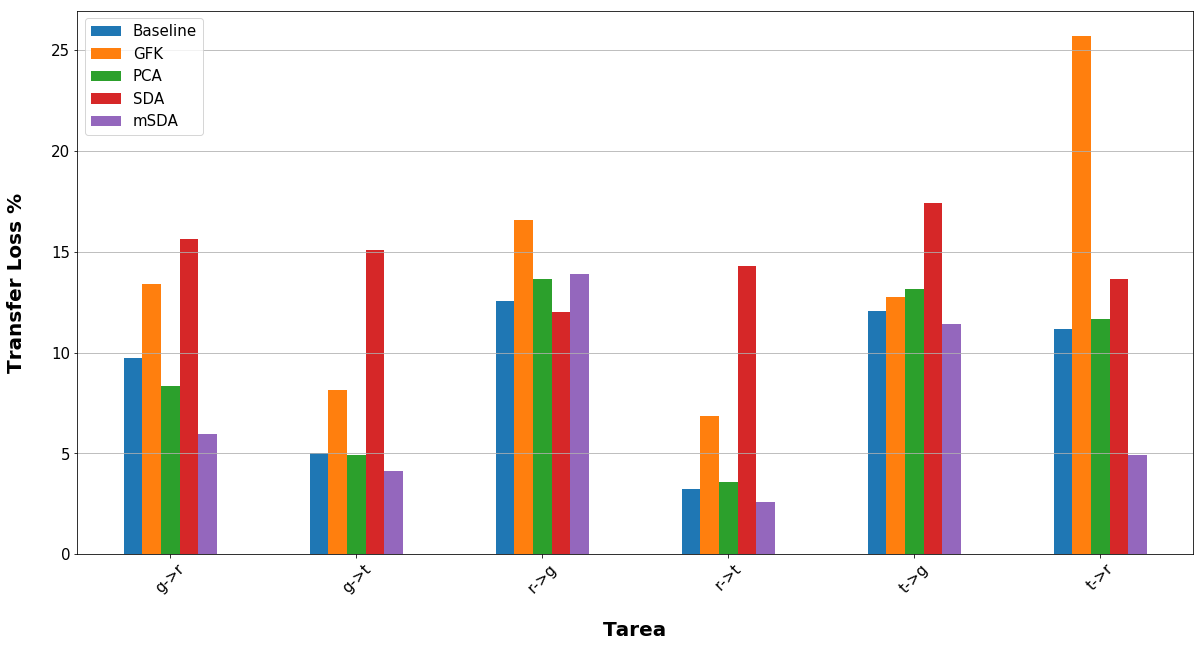

In [6]:
dimensions = [2000, 1000]
prefixes = ["me1_", "me2_"]
dataset_name = datasets[1]

pairs = [(x, y) for x in dimensions for y in prefixes]

for dim, prefix in pairs:
    df_twitter = get_scores_dataframe(dataset_name, dim, prefix)
    
    twitter_plot = df_twitter.plot(kind='bar', figsize=(20,10), rot=45, fontsize=15, legend=False)
    patches, labels = twitter_plot.get_legend_handles_labels()

    twitter_plot.legend(patches, labels, loc='best', fontsize=15)
    twitter_plot.yaxis.grid(which='major')

    twitter_plot.set_ylabel("Transfer Loss %", labelpad=25,fontsize=20, weight='bold')
    twitter_plot.set_xlabel("Tarea", labelpad=25,fontsize=20, weight='bold')

    figure_path = os.path.join(graficos_path, dataset_name, "%stloss_%d.eps" % (prefix, dim))
    plt.savefig(figure_path, bbox_inches='tight')


# Comparacion de algoritmos por Marco Experimental

##  Amazon

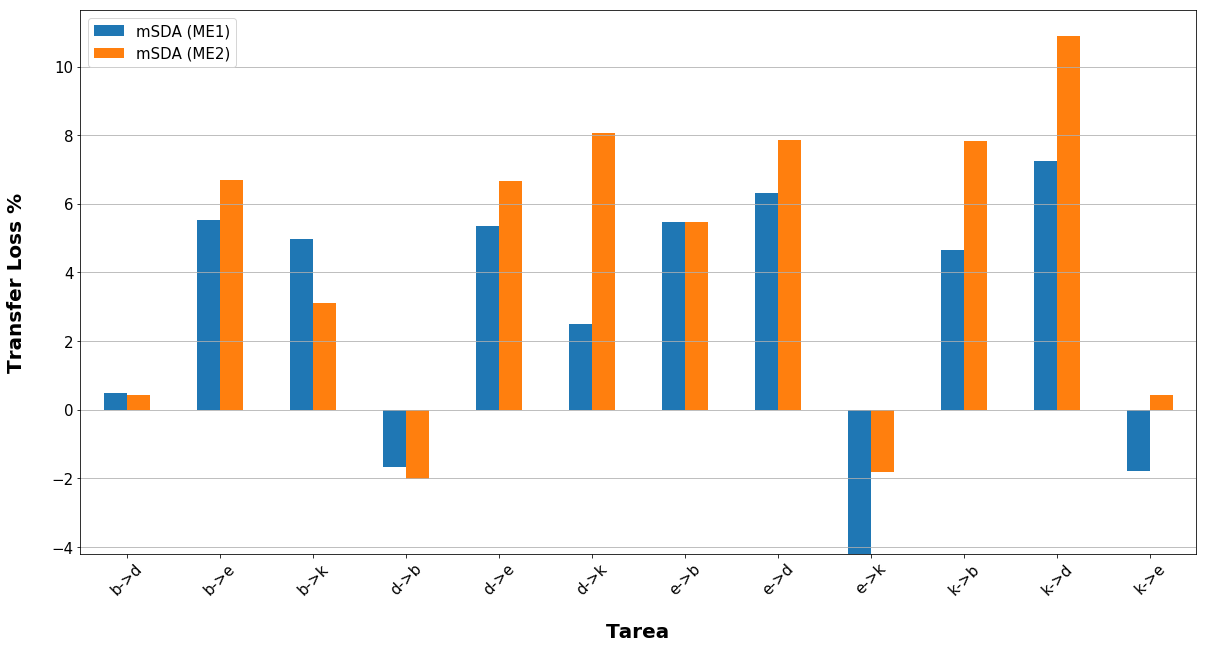

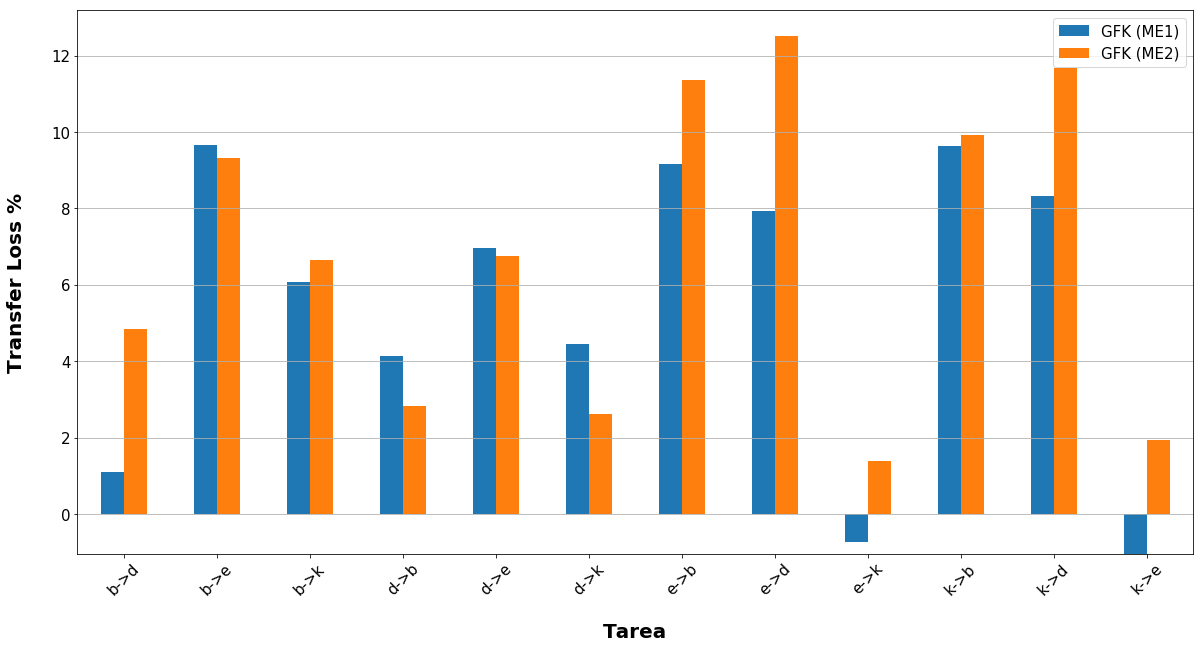

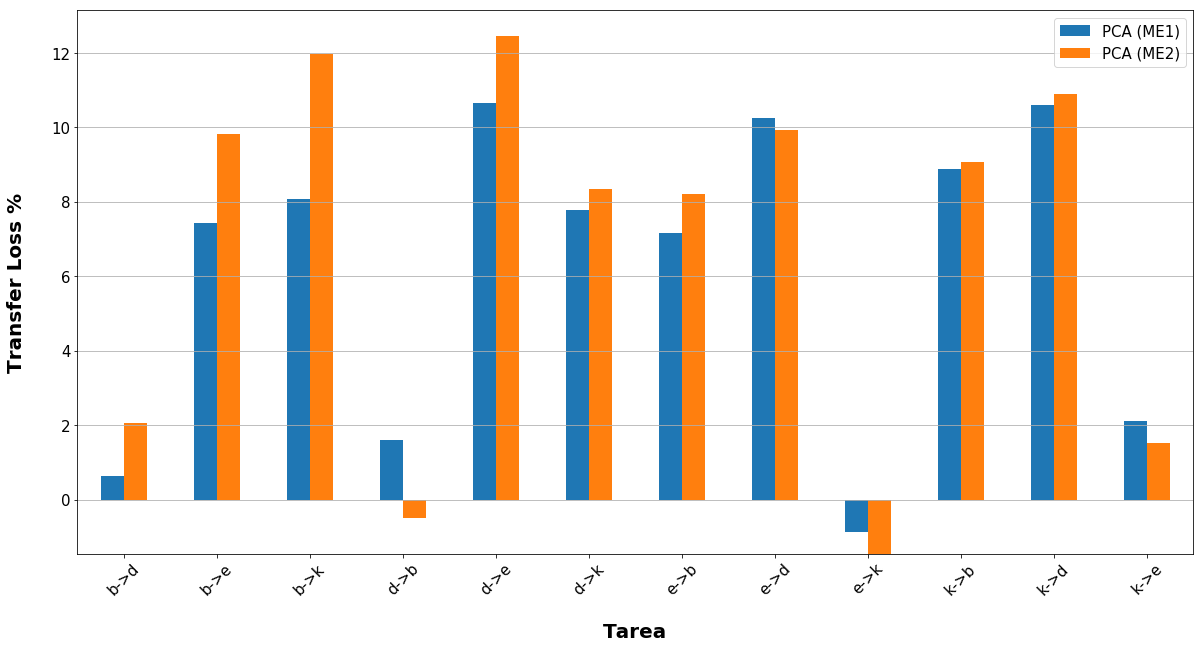

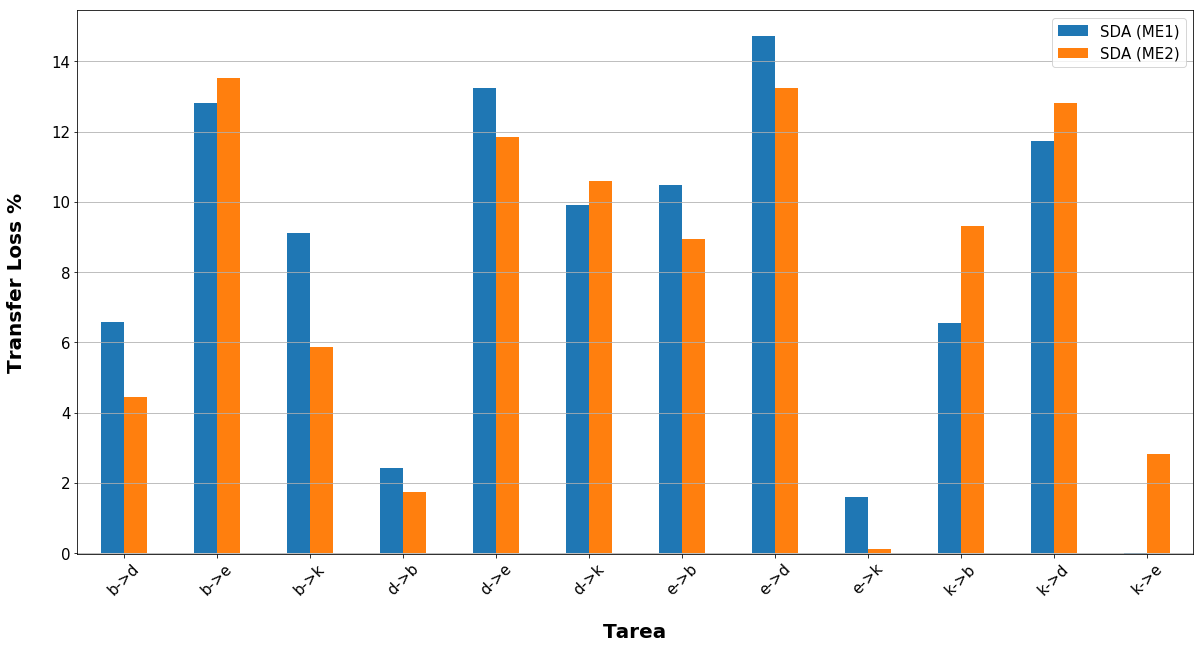

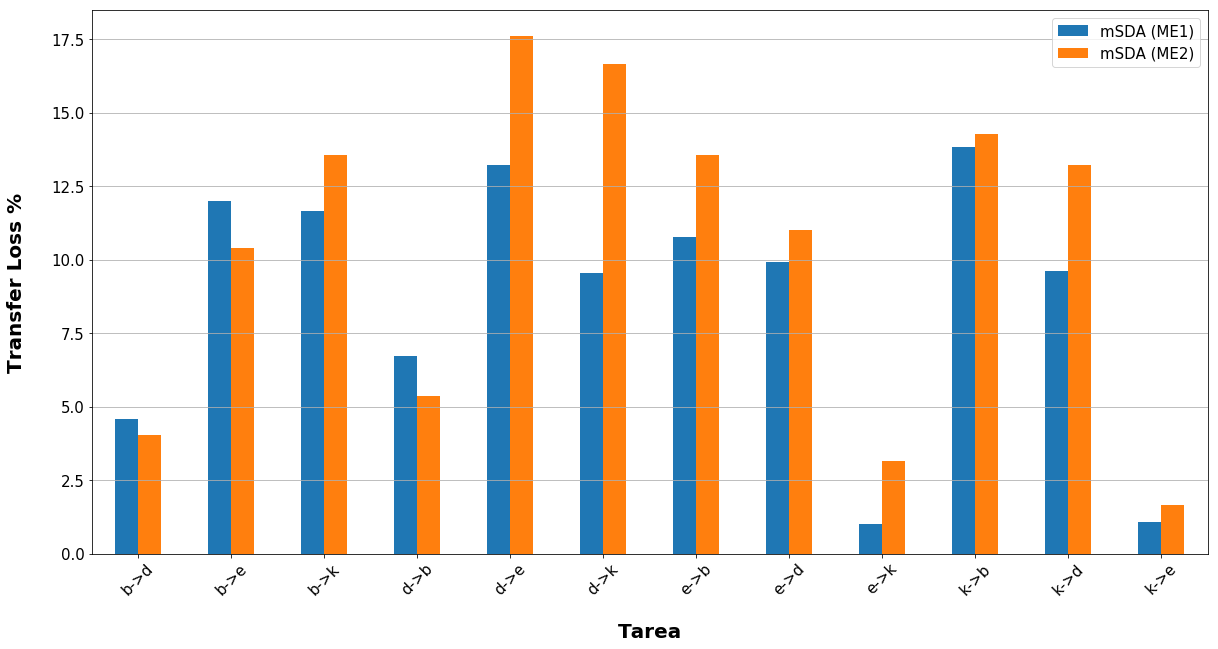

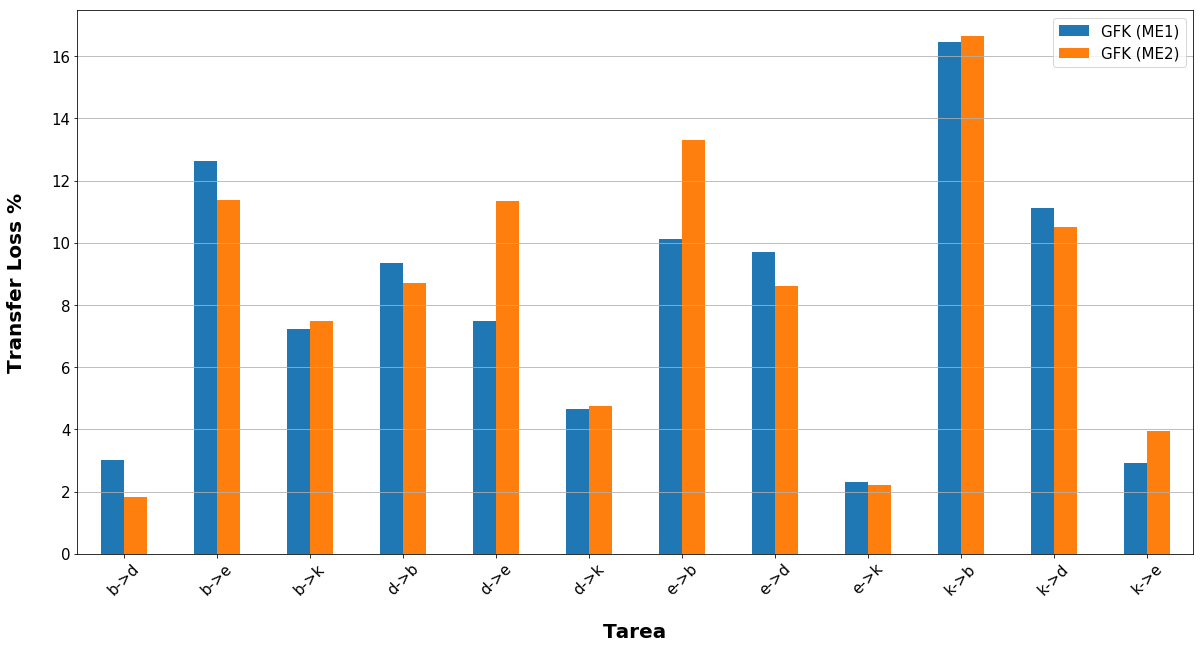

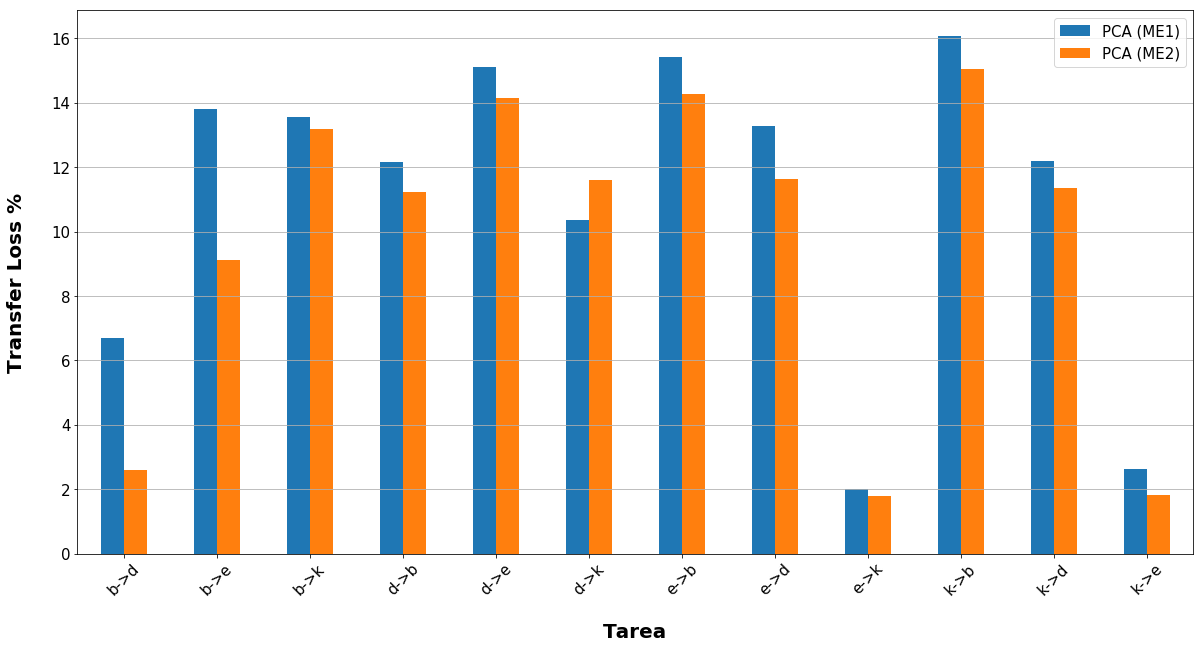

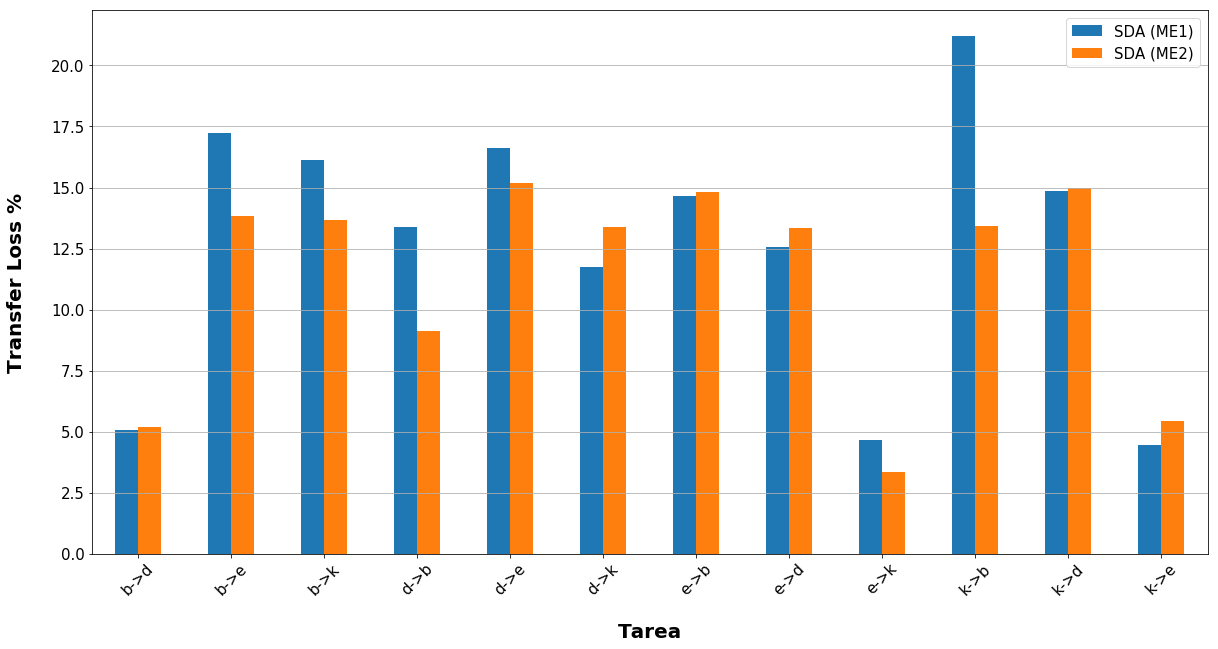

In [7]:
for dims in [1000, 3000]:
    for method in pruebas:
        if method is not "baseline":
            df_twitter = get_comparison_dataframe(datasets[0], dims, method)
            
            
            twitter_plot = df_twitter.plot(kind='bar', figsize=(20,10), rot=45, fontsize=15, legend=False)
            patches, labels = twitter_plot.get_legend_handles_labels()

            twitter_plot.legend(patches, labels, loc='best', fontsize=15)
            twitter_plot.yaxis.grid(which='major')

            twitter_plot.set_ylabel("Transfer Loss %", labelpad=25,fontsize=20, weight='bold')
            twitter_plot.set_xlabel("Tarea", labelpad=25,fontsize=20, weight='bold')

            figure_path = os.path.join(graficos_path, datasets[0], "me_%s_%d.eps" % (method, dims))
            
            plt.savefig(figure_path, bbox_inches='tight')

## Twitter

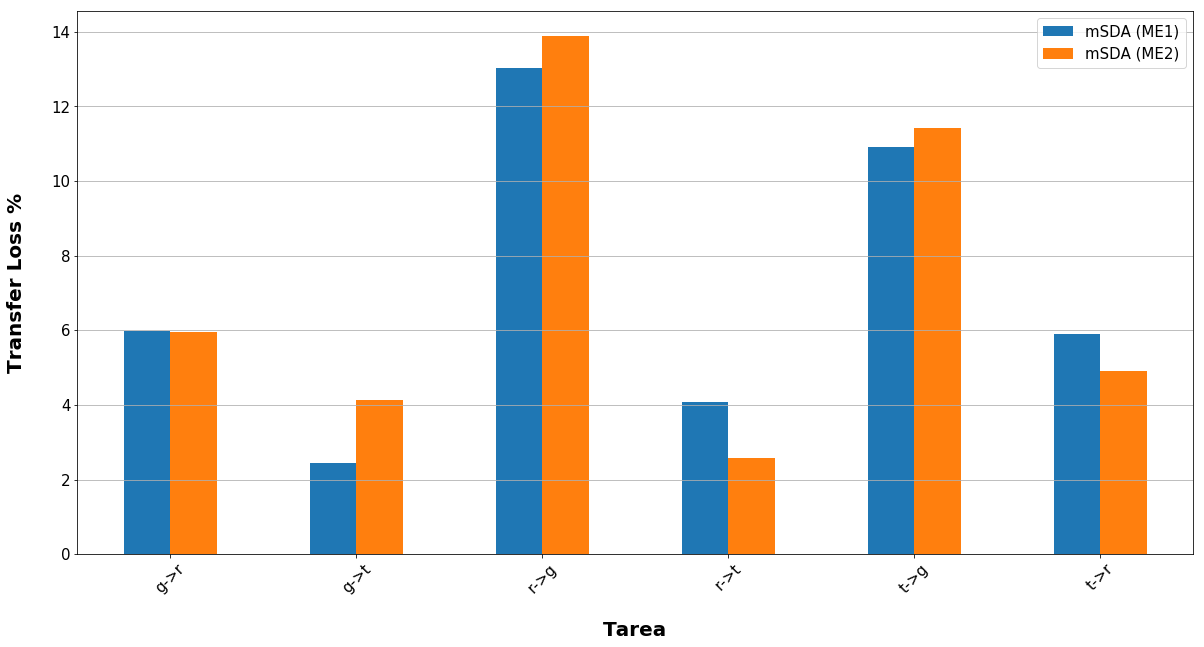

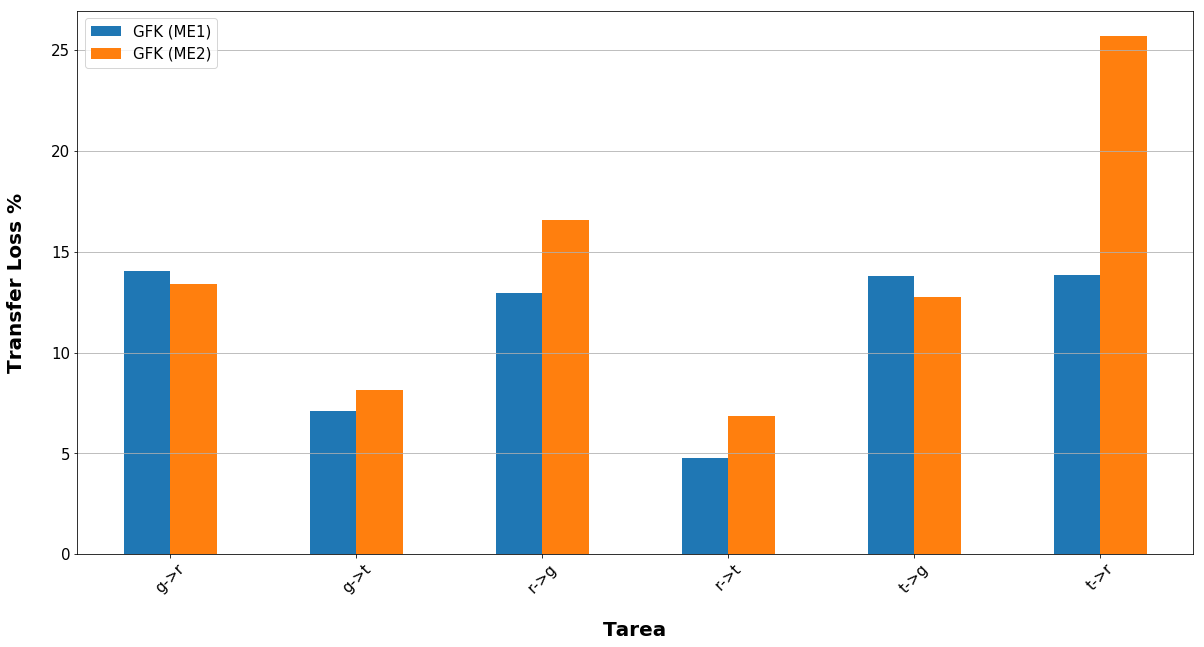

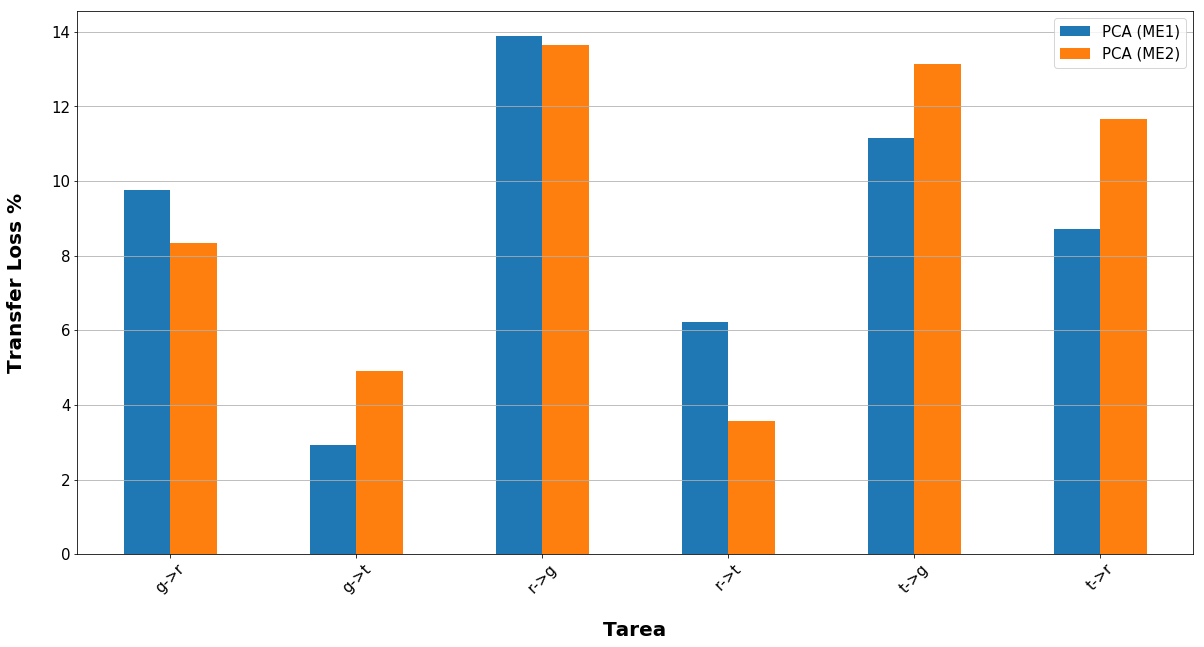

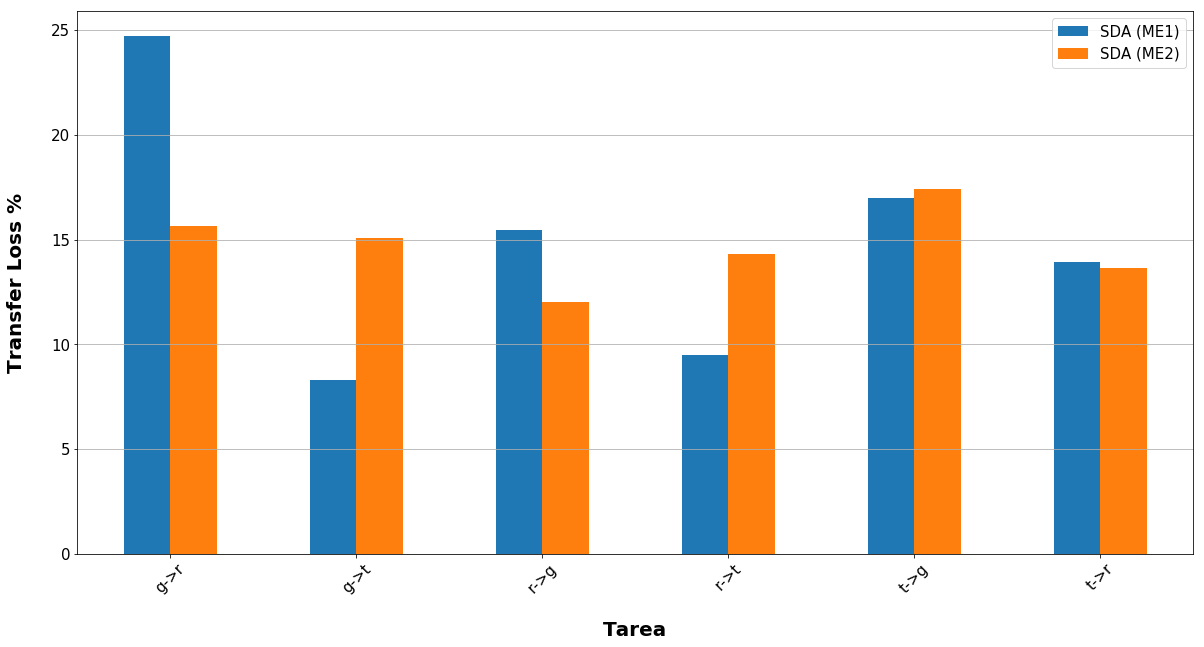

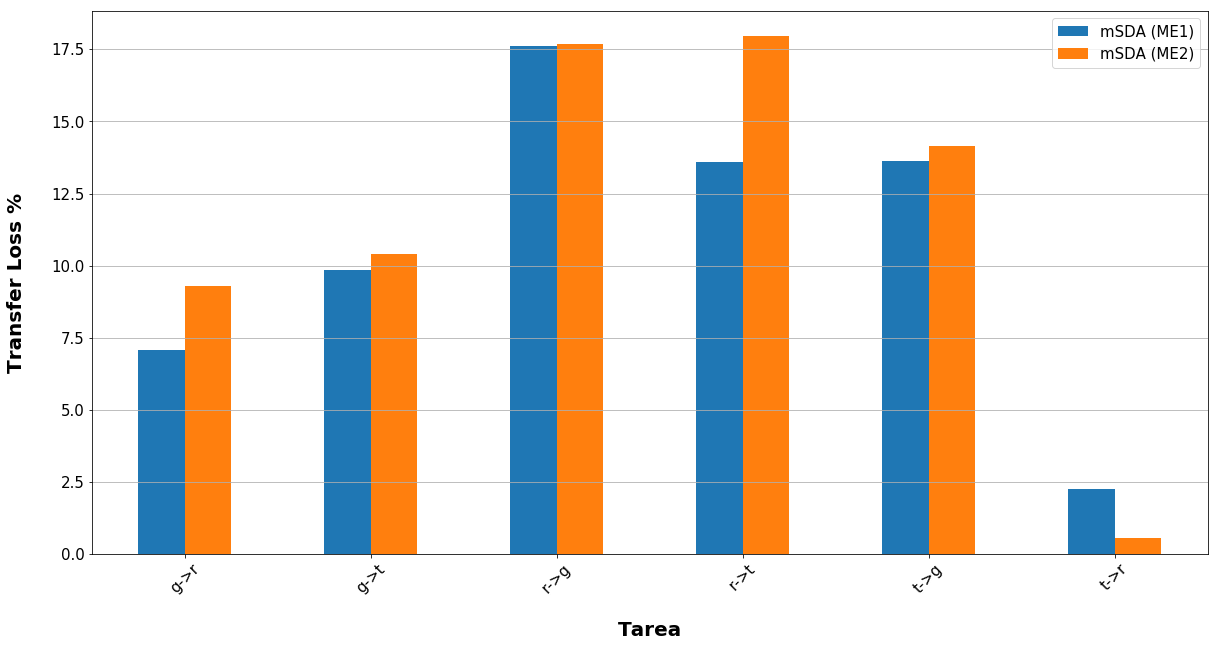

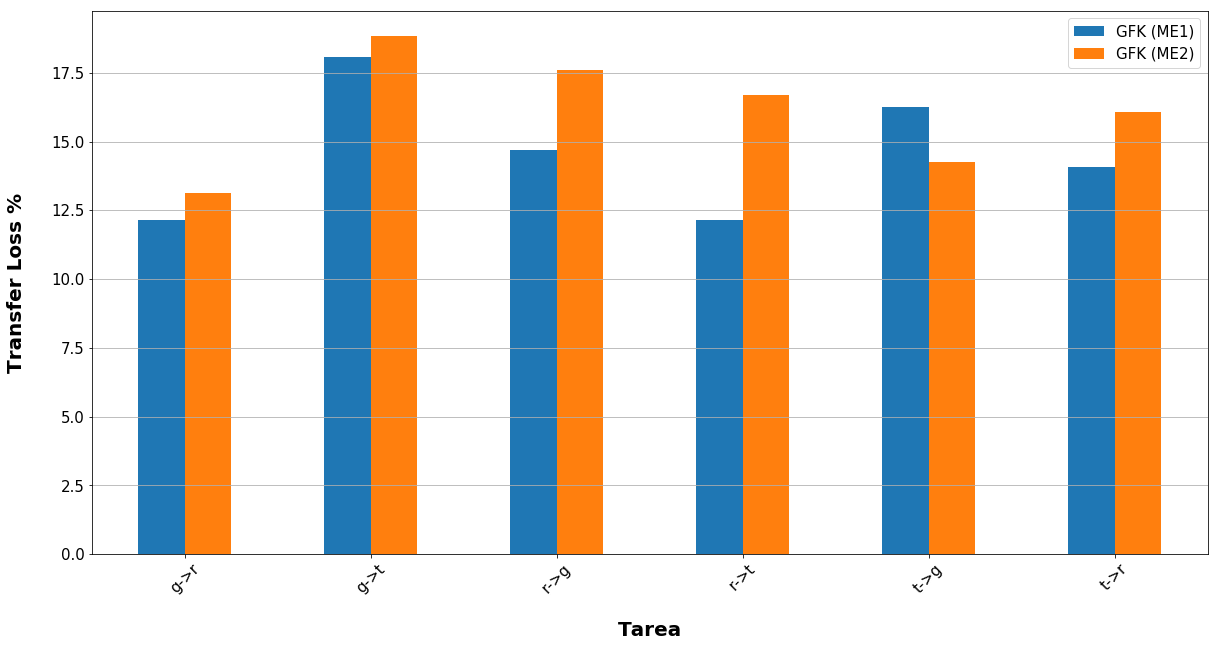

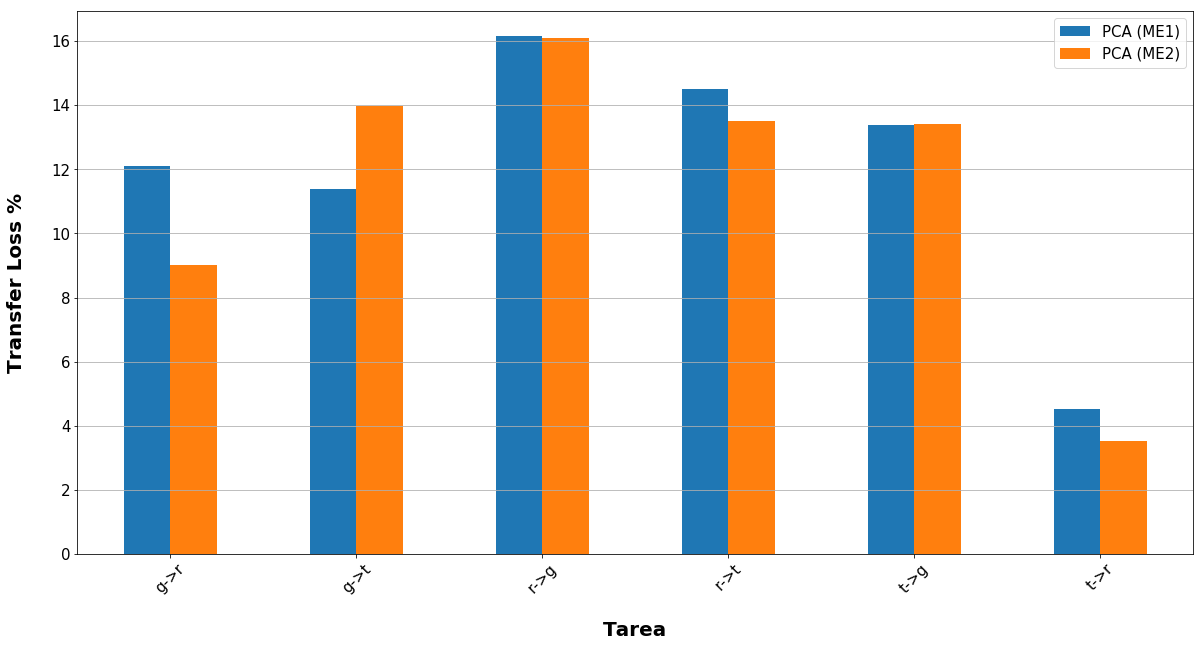

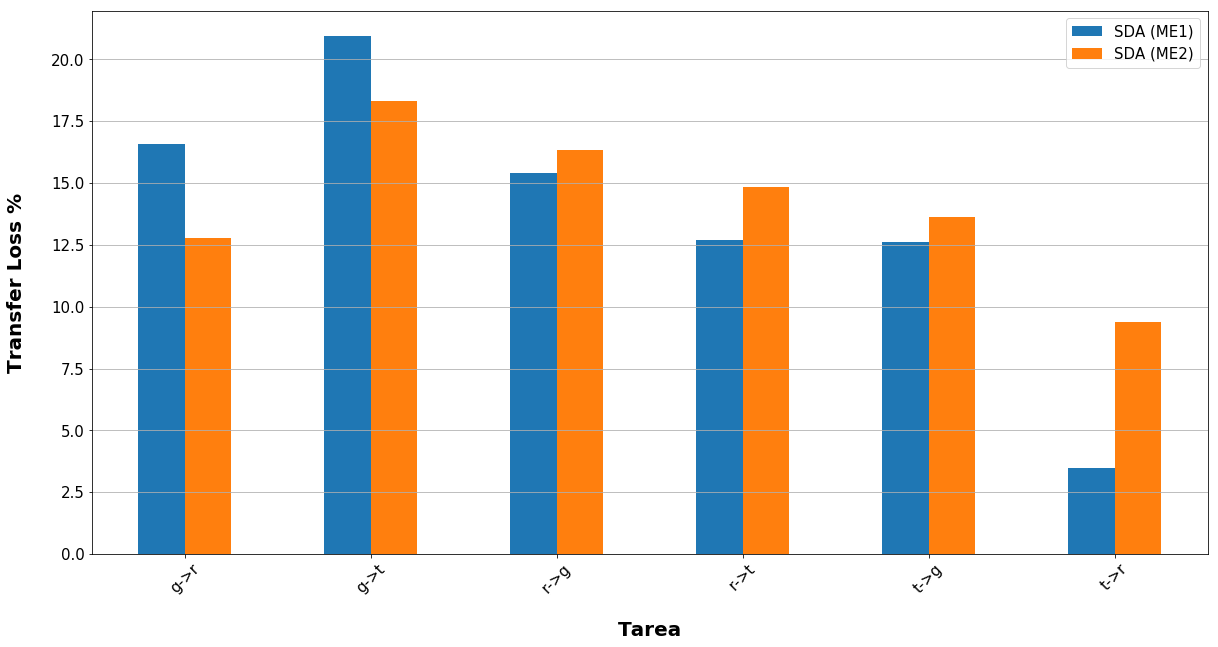

In [8]:
for dims in [1000, 2000]:
    for method in pruebas:
        if method is not "baseline":
            df_twitter = get_comparison_dataframe(datasets[1], dims, method)
            
            
            twitter_plot = df_twitter.plot(kind='bar', figsize=(20,10), rot=45, fontsize=15, legend=False)
            patches, labels = twitter_plot.get_legend_handles_labels()

            twitter_plot.legend(patches, labels, loc='best', fontsize=15)
            twitter_plot.yaxis.grid(which='major')

            twitter_plot.set_ylabel("Transfer Loss %", labelpad=25,fontsize=20, weight='bold')
            twitter_plot.set_xlabel("Tarea", labelpad=25,fontsize=20, weight='bold')

            figure_path = os.path.join(graficos_path, datasets[1], "me_%s_%d.eps" % (method, dims))
            
            plt.savefig(figure_path, bbox_inches='tight')